# K Test CBSD68 Denoising Dataset

* All images are 256x256 size, 2000 training images and 800 testing images. 
* K = 9, 16, 25, 36, 49, 64

In [1]:
import os

current_dir = os.getcwd()
print("Current directory:", current_dir)

Current directory: /home/mkang2/Convolutional-Nearest-Neighbor/Testing


In [ ]:
# Torch
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch import optim 
from torchsummary import summary
from torchvision.transforms import v2
import numpy as np


# Train + Data 
import sys 
sys.path.append('../Layers')
from Conv1d_NN import *
from Conv2d_NN import *
from Conv1d_NN_spatial import * 

from Conv2d_NN_spatial import * 
from ConvNN_CNN_Branching import *

sys.path.append('../Data')
from CBSD68 import NoisyCBSD68_dataset, test_denoise_visual_CBSD


sys.path.append('../Models')
from denoising_models import DenoisingCNN, DenoisingConvNN_2D_K_All,DenoisingConvNN_2D_K_N

sys.path.append('../Train')
from train2d import train_denoising_model, evaluate_denoising_accuracy, evaluate_accuracy_psnr


import numpy as np


In [ ]:
noisycbsd68 = NoisyCBSD68_dataset(batch_size=32, noise_std=0.3, train_count=2000, test_count=400, target_size=256)

In [4]:
print(len(noisycbsd68.train_data))
print(len(noisycbsd68.test_data))
print(len(noisycbsd68.test_data[0]))
print(noisycbsd68.train_data[0][0].shape)


200
40
3
torch.Size([3, 200, 200])


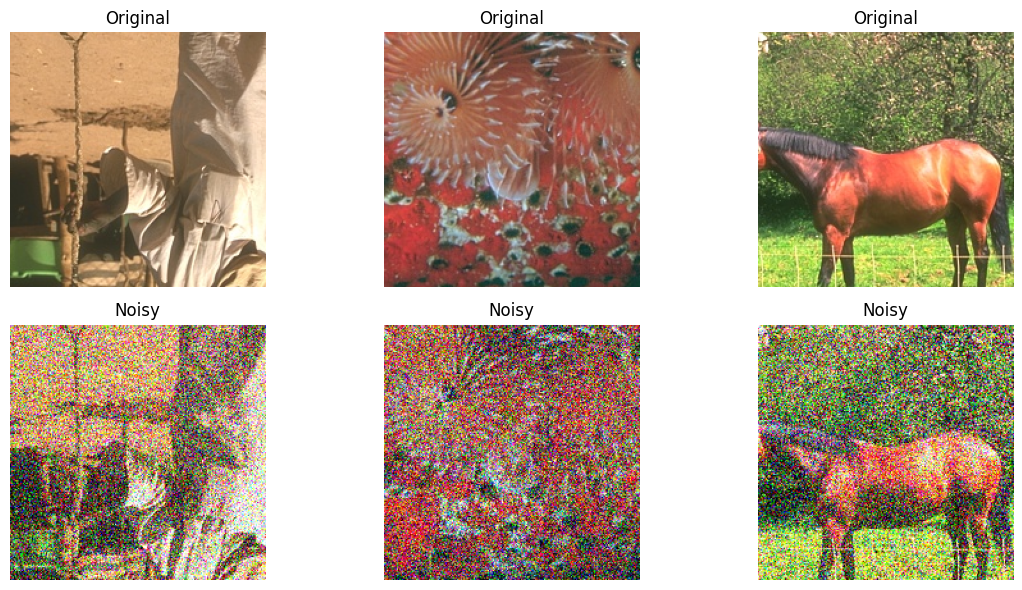

In [5]:
noisycbsd68.visual(3)

Epoch 1, Time: 0.8170826435089111, Loss: 0.17245567909308843
Epoch 2, Time: 0.5378191471099854, Loss: 0.043603211641311646
Epoch 3, Time: 0.5427150726318359, Loss: 0.028474348996366774
Epoch 4, Time: 0.5330171585083008, Loss: 0.02717162828360285
Epoch 5, Time: 0.5363364219665527, Loss: 0.02020240175936903
Epoch 6, Time: 0.5340480804443359, Loss: 0.017990865345512117
Epoch 7, Time: 0.5535452365875244, Loss: 0.015894056963069097
Epoch 8, Time: 0.529085636138916, Loss: 0.014943779978368963
Epoch 9, Time: 0.5274291038513184, Loss: 0.013587988780013152
Epoch 10, Time: 0.5378193855285645, Loss: 0.011853479913302831

 Average epoch time: 0.5648897886276245
Average loss on test set: 0.010975721292197704
Average PSNR on test set: 19.933513641357422


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0360256..1.0359299].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.013690677..1.012807].


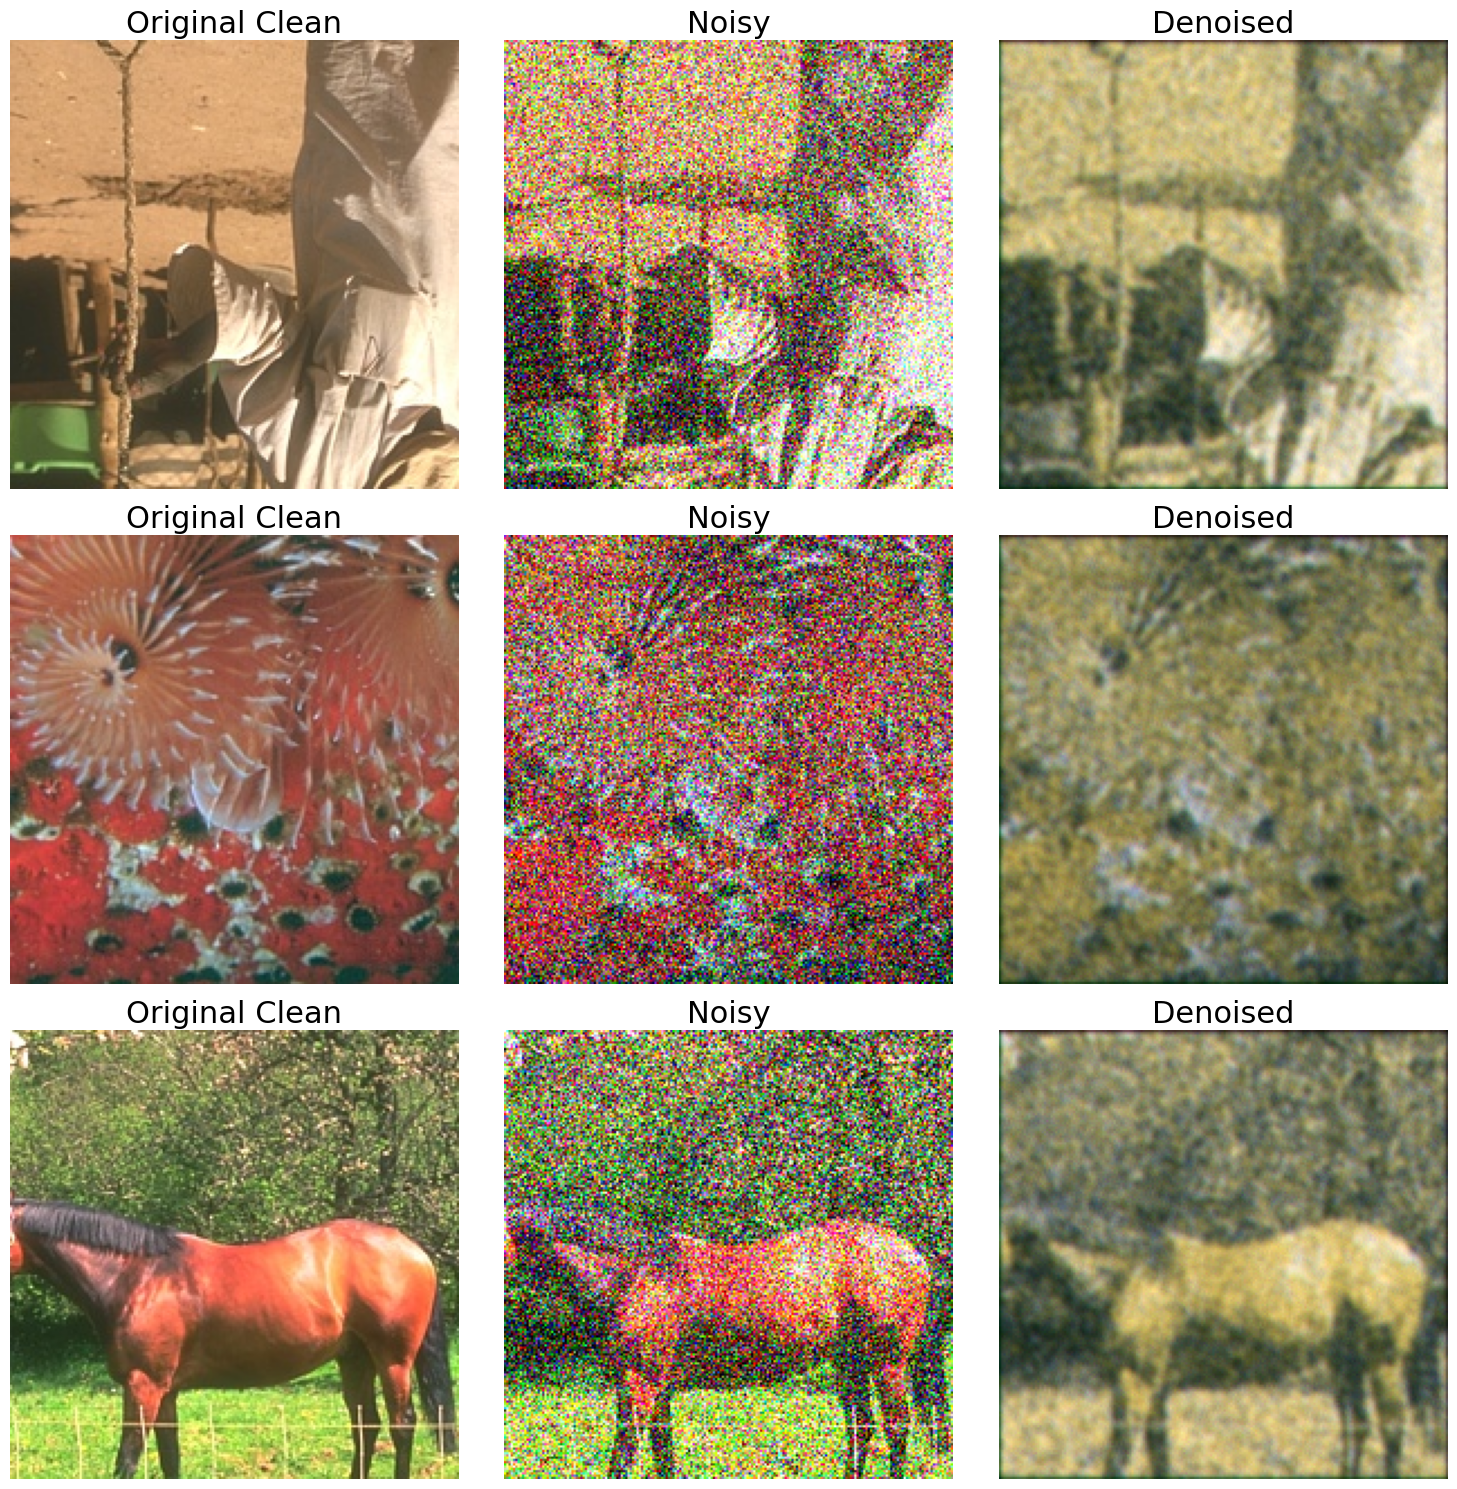

In [6]:
# CNN control model 
CNN = DenoisingCNN(in_ch=3, out_ch=3, kernel_size=3, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(CNN.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(CNN, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(CNN, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(CNN, noisycbsd68.test_loader, criterion, device='cuda')


# Print out output of trained model
test_denoise_visual_CBSD(CNN, noisycbsd68.test_data, device='cuda')


### All Samples, K = 9, 16, 25, 36, 49, 64


In [ ]:
# ConvNN K = 9, N = All
denoising_convNN_2D_9_All = DenoisingConvNN_2D_K_All(in_ch=3, out_ch=3, K=9, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_9_All.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_9_All, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_9_All, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_9_All, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_9_All, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 16, N = All
denoising_convNN_2D_16_All = DenoisingConvNN_2D_K_All(in_ch=3, out_ch=3, K=16, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_16_All.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_16_All, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_16_All, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_16_All, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_16_All, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 25, N = All
denoising_convNN_2D_25_All = DenoisingConvNN_2D_K_All(in_ch=3, out_ch=3, K=25, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_25_All.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_25_All, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_25_All, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_25_All, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_25_All, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 36, N = All
denoising_convNN_2D_36_All = DenoisingConvNN_2D_K_All(in_ch=3, out_ch=3, K=36, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_36_All.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_36_All, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_36_All, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_36_All, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_36_All, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 49, N = All
denoising_convNN_2D_49_All = DenoisingConvNN_2D_K_All(in_ch=3, out_ch=3, K=49, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_49_All.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_49_All, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_49_All, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_49_All, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_49_All, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 64, N = All
denoising_convNN_2D_64_All = DenoisingConvNN_2D_K_All(in_ch=3, out_ch=3, K=64, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_64_All.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_64_All, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_64_All, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_64_All, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_64_All, noisycbsd68.test_data, device='cuda')



### N Samples, K = 9, 16, 25, 36, 49, 64
- K * 2 samples: 
    - 9: 18 samples
    - 16: 32 samples
    - 25: 50 samples
    - 36: 72 samples
    - 49: 98 samples
    - 64: 128 samples

In [ ]:
# ConvNN K = 9, N = 50
denoising_convNN_2D_9_18 = DenoisingConvNN_2D_K_N(in_ch=3, out_ch=3, K=9, N=18, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_9_18.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_9_18, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_9_18, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_9_18, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_9_18, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 16, N = 50
denoising_convNN_2D_16_32 = DenoisingConvNN_2D_K_N(in_ch=3, out_ch=3, K=16, N=32, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_16_32.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_16_32, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_16_32, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_16_32, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_16_32, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 25, N = 50
denoising_convNN_2D_25_50 = DenoisingConvNN_2D_K_N(in_ch=3, out_ch=3, K=25, N=50, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_25_50.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_25_50, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_25_50, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_25_50, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_25_50, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 36, N = 50
denoising_convNN_2D_36_72 = DenoisingConvNN_2D_K_N(in_ch=3, out_ch=3, K=36, N=72, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_36_72.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_36_72, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_36_72, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_36_72, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_36_72, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 49, N = 98
denoising_convNN_2D_49_98 = DenoisingConvNN_2D_K_N(in_ch=3, out_ch=3, K=49, N=98, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_49_98.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_49_98, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_49_98, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_49_98, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_49_98, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 64, N = 128
denoising_convNN_2D_64_128 = DenoisingConvNN_2D_K_N(in_ch=3, out_ch=3, K=64, N=128, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_64_128.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_64_128, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_64_128, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_64_128, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_64_128, noisycbsd68.test_data, device='cuda')

